<a href="https://colab.research.google.com/github/akalakheti/Wisconsin_Breast_Cancer/blob/master/Wisconsin_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0

# Import all the dependencies required

In [0]:
import tensorflow as tf
import numpy as np
from sklearn import datasets 
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# Problem
Breast cancer is the deadliest cancer among women. According to Cancer.net statistics, This year, an estimated 268,600 women in the United States will be diagnosed with invasive breast cancer. It is estimated that 42,260 deaths (41,760 women and 500 men) from breast cancer will occur this year.
This high mortality rate of breast cancer is due to lack of early attention. If it can be diagnosed early, then a lot of lives could be saved. So, here I will be developing a Machine Learning based Breast Cancer detection that will be a binary classifier.

# Dataset used
Here, we will be using the Wisconsin breast cancer dataset from UCI (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) which contains 30 parameters like radius,texture,symmetry,etc. and a total of 569 data examples. This dataset contains 357 malignant and 212 benign cases. To prevent biasness, we will be randomly choosing examples for train and test data.

In [0]:
dataset = datasets.load_breast_cancer()

Separating data and label

In [0]:
data, label = dataset.data, dataset.target

Creating random index for train and test dataset using numpy. 80% of the total data will be used as training set and rest will be used as test set.

In [0]:
train_i = np.random.choice(len(label), round(len(label) * 0.8), replace=False)
test_i = np.array(list(set(range(len(label)))-set(train_i)))

In [0]:
train_data= data[train_i]
test_data = data[test_i]
train_target = label[train_i]
test_target = label[test_i]

In [0]:
temp = list(test_target)
target = []
for i in range (len(temp)):
  target.append([temp[i]])

# Strategy Used

To tackle this binary classification problem, we will be using a fully connected neural network. We will be using this algorithm to provide non-linear solution to the data. Having a lot of parameters, I found Fully Connected Neural Network would be a better option.  It has an input shape of 30, with 2 hidden layers containing 120 and 60 nodes respectively. The output layer contains only one node as this is a binary classification. ReLu is used as activation function for hidden layers where as sigmoid activation function is used for output layer as sigmoid provides better result for output.

In [0]:
model = tf.keras.Sequential([
                             layers.Dense(30, activation='relu'),
                             layers.Dense(120, activation='relu'),
                             
                             layers.Dense(60, activation='relu'),
                             layers.Dense(1, activation='sigmoid')
                             ])

Compiling and training the model with adam optimizer and binary cross entropy loss function.

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_data, train_target, epochs=30, batch_size=1, validation_data=(test_data, test_target))

Train on 455 samples, validate on 114 samples
Epoch 1/30
455/455 [==============================] - 2s 4ms/sample - loss: 0.2227 - accuracy: 0.9231 - val_loss: 0.1760 - val_accuracy: 0.9474
Epoch 2/30
455/455 [==============================] - 2s 4ms/sample - loss: 0.1933 - accuracy: 0.9297 - val_loss: 0.3463 - val_accuracy: 0.8421
Epoch 3/30
455/455 [==============================] - 2s 4ms/sample - loss: 0.1795 - accuracy: 0.9187 - val_loss: 0.3830 - val_accuracy: 0.8860
Epoch 4/30
455/455 [==============================] - 2s 4ms/sample - loss: 0.1816 - accuracy: 0.9143 - val_loss: 0.2061 - val_accuracy: 0.9298
Epoch 5/30
455/455 [==============================] - 2s 4ms/sample - loss: 0.2596 - accuracy: 0.9099 - val_loss: 0.2587 - val_accuracy: 0.9035
Epoch 6/30
455/455 [==============================] - 2s 4ms/sample - loss: 0.2153 - accuracy: 0.9143 - val_loss: 0.1899 - val_accuracy: 0.9298
Epoch 7/30
455/455 [==============================] - 2s 4ms/sample - loss: 0.2205 - accur

# Evaluating the model

In [0]:
test_loss, test_acc = model.evaluate(test_data,  test_target)

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
test_acc

0.95614034

In [0]:
pred = model.predict(test_data)

In [0]:
recall = tf.keras.metrics.Recall()
recall.update_state(target, pred)
recall.result().numpy()

0.9726027

In [0]:
precision = tf.keras.metrics.Precision()
precision.update_state(target,pred)
precision.result().numpy()

0.9594595

# Visualizing model's performance

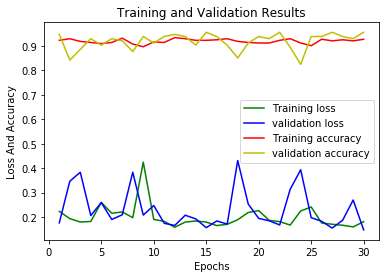

In [0]:

loss_train = history.history['loss']
accuracy_train = history.history['accuracy']

loss_val = history.history['val_loss']
accuracy_val = history.history['val_accuracy']

epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.plot(epochs, accuracy_train, 'r', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'y', label='validation accuracy')
plt.title('Training and Validation Results')
plt.xlabel('Epochs')
plt.ylabel('Loss And Accuracy')
plt.legend()
plt.show()

#Conclusion:
The training accuracy oscilates aroud 90-93% and validation accuracy is found to be 95.61%. The test accuracy is also 95.61%. The precision and recall on the test data was found to be 0.9594 and 0.9726 respectively.  This proves that the model is good and is not overfitted. The results are promising. Hence, we could use this classification model for further works.